# The Guidance to Optimization with Python

In this notebook, we show the usage of a few optimization packages.  

There are some packages we should get familiar with first: ``numpy``, ``scipy``, ``pandas`` are the daily packages. There are also many highly-integrated packages like ``scikit`` related packages; see [Scikits](http://scikits.appspot.com/scikits).  Although the implementations are not necessary the fastest or the best, but it suffices for many tasks already.

In [ ]:
! pip install -q numpy scipy pandas scikit-image scikit-learn cvxpy cvxopt

# Unconstrained optimization Part I (``scipy``)
In unconstrained optimization, the ``scipy`` package provides an interface of minimization to many solvers. The solvers are mostly deterministic, which are useful for well defined functions and smooth functions. 

In general, the second order based method are converging faster than the first order methods, ``BFGS``, ``L-BFGS-B``, ``Newton-CG`` are superlinear in practice. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [ ]:
# The minimize function is usually called in the following way:
# scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, tol=None)

# There are some other options as well.
#
#
#
# In this example, we minimize the 10 dimensional Rosenbrock function for an example.
# The function has been implemented in scipy.optimize already. 

# We use the BFGS for an example.
from scipy.optimize import rosen, rosen_der, rosen_hess

x0 = np.random.random([1,10])
res = minimize(rosen, x0, method='BFGS', jac=rosen_der, tol=1e-6)
print("Iteration: {it},\nSolution: {x0}".format(it=res.nit, x0=res.x))

Iteration: 67,
Solution: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Here we try the L-BFGS-B method instead.
res = minimize(rosen, x0, method='L-BFGS-B', jac=rosen_der, tol=1e-6)
print("Iteration: {it},\nSolution: {x0}".format(it=res.nit, x0=res.x))

Iteration: 56,
Solution: [1.00000531 1.00000691 1.00000775 1.0000089  1.00000865 1.00000529
 0.99999955 0.99999534 0.99998899 0.99998071]


In [ ]:
# Here we try the Newton's method instea with Hessian supplied.
res = minimize(rosen, x0, method='Newton-CG', jac=rosen_der, hess=rosen_hess, tol=1e-6)
print("Iteration: {it},\nSolution: {x0}".format(it=res.nit, x0=res.x))

Iteration: 42,
Solution: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Unconstrained optimization Part II (``scipy``) 
For the functions without gradients supplied, the global search algorithms are more favorable even though the theory is not complete. 

In ``scipy``, the ``de`` function is implemented in ``scipy.optimize.differential_evolution``.  The method is fast compared to many other implementations. 

In [ ]:
# Signature is func, bounds, args=(), strategy='best1bin', maxiter=1000, 
# popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, 
# callback=None, disp=False, polish=True, init='latinhypercube', atol=0, 
# updating='immediate', workers=1)
#
# In this example, we use de to minimize the Rosenbrock function on a 10-dimensional space.
from scipy.optimize import rosen, differential_evolution
bounds = [(0,2)] * 10
result = differential_evolution(rosen, bounds)
print(result.x, result.fun)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 4.425205720322333e-24


# Constrained optimization Part I
For the constrained optimization, there are many more problem to deal with. 

The first problem to solve is the linear programming problem. 

## Linear programming (Scipy)

In ``scipy``,  the linear programming is implemented in ``linprog`` module. There are two methods: ``simplex`` and ``interior-point``.  The ``simplex`` method is more like a brute-force search algorithm, it has high complexity, therefore not suitable for high dimensional problem. The ``interior-point`` method is makeing the problem into primal-dual formulation and place a ``log`` barrier for the inequality constraints. 

In [ ]:
from scipy.optimize import linprog
from time import time

In [ ]:
# Suppose the following LP problem:
#
# f = -1x[0] + 4x[1]
# 
# -3x[0] + 1x[1] <= 6
#  1x[0] + 2x[1] <= 4
#          x[1] >= -3
#  -inf <= x[0] <= inf

c = [-1, 4]
A = [[-3, 1], [1, 2]]
b = [6, 4]

x0_bounds = (None, None)
x1_bounds = (-3, None)

# The default method is the ``simplex``. It is working good for low dimensional problem.
#
# Constraint is A x <= b


res = linprog(c, A_ub=A, b_ub=b, bounds=(x0_bounds, x1_bounds),
               options={"disp": True})

Optimization terminated successfully.
         Current function value: -22.000000  
         Iterations: 5


In [ ]:
# If we try a random objective function with slightly higher dimension n =40

n = 40
m = 3

c = np.ones(n)
A = np.random.random([m, n])
b = -np.ones(m)

bounds=np.array([[ -1, 1] ] * n)


start = time()

res = linprog(c, A_ub=A, b_ub=b, bounds=bounds,
               options={"disp": True})

end = time()
print('elapsed time is', end-start, 'seconds')


Optimization terminated successfully.
         Current function value: -40.000000  
         Iterations: 78
elapsed time is 0.09037947654724121 seconds


In [ ]:
# Using the interior method is faster than the simplex method.
start = time()
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='interior-point',options={"disp": True})

end = time()
print('elapsed time is', end-start, 'seconds')

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 0.0                 
0.3326879955783     0.3326879955783     0.3326879955783     0.6736227304404  0.3326879955783     -6.174349455581     
0.1810551848104     0.1810551848102     0.1810551848102     0.4873028582377  0.1810551848102     -25.53634914198     
0.01479751043742    0.01479751043742    0.01479751043742    0.9224988211817  0.01479751043742    -38.60708659886     
7.900641175655e-06  7.900641179457e-06  7.900641179461e-06  0.9994730478379  7.900641179458e-06  -39.99950198698     
3.950422213571e-10  3.950330935312e-10  3.950330935322e-10  0.9999499998691  3.950330935315e-10  -39.9999999751      
1.796318324455e-14  1.975172724027e-14  1.97516546769e-14   0.99995          1.975165467688e-14  -40.0               
Optimization terminated successfully.
         Current fu

## Linear programming (CVXPY)
``cvxpy`` is another package for optimization (convex optimization).  See its homepage [cvxpy](https://www.cvxpy.org/). 

There are a few examples of its usages at https://www.cvxpy.org/examples/index.html .

For linear programming,  see https://www.cvxpy.org/examples/basic/linear_program.html .  

The solution is solved through ``SQP`` method. 

In [ ]:
import cvxpy as cp # this package is preinstalled on colab.
import numpy as np

In [ ]:
# Define and solve the CVXPY problem.
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize(c.T@x),
                 [A@x <= b, 
                  x<= 1,
                  x>= -1])
start = time()
prob.solve(verbose=True)
end = time()
print('elapsed time is', end-start, 'seconds')

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution is")
print(prob.constraints[0].dual_value)

-----------------------------------------------------------------
           OSQP v0.5.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2018
-----------------------------------------------------------------
problem:  variables n = 40, constraints m = 83
          nnz(P) + nnz(A) = 200
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on

iter   objective    pri res    dua res    rho        time
   1  -3.9352e+01   4.99e+00   1.18e+00   1.00e-01   6.07e-04s
 200  -3.2366e+01   2.91e-01   1.18e-01   1.00e-01   1.92e-03s
 400  -4.7645e+01   2.91e-01   3.82e-02   1.54e-02   4.32e-04s
 6

## Linear constrained problem: L1 minimization

The L1 minimization is mostly compared with the least square problems. The L1 minimization usually is referred as compressive sensing, which makes assumption that the information is sparse by some encoding and minimize on the encoded space. 

For example, the acoustic signals and images are sparse in either frequency or under discrete cosine transform. 

The following L1 minimization is equivalent to linear programming. 

$$\text{minimize } \|x\|_{L^1}\quad \text{subject to } Ax = b$$

By setting $x^{+} = \max(x, 0)$ and $x^{-} = -\min(x, 0)$, one can reformulate the problem by

$$\text{minimize } \mathbf{1}^T x^{+} + \mathbf{1}^T x^{-} \quad \text{subject to } A(x^{+} - x^{-}) = b,\; x^{+}\ge 0,\; x^{-}\ge 0$$

This problem is relevant to a lot of applications in the compressive sensing. The matrix $A$ is sensing matrix, usually it is certain kind of projection or sampling. 

In [ ]:
# We choose a random matrix from randn as our A matrix and see if it can recover the sparse information in the x. 

n = 500

# generate an array with 10 nonzeros.
x = np.zeros(n)
x[np.random.choice(n, 10)] = 1

# get the sample output with 10% data
A = np.random.randn(50, 500)
b = A@x

# recover x using L1 minimization, we use the scipy's linprog method to find the solution.
c = np.ones(2 * n)
A1 = np.block([A, -A])
bounds = [[0, None]] * (2 * n)

start = time()
res = linprog(c, A_eq=A1, b_eq=b, bounds=bounds, method='interior-point',options={"disp": True})
end = time()

# recover the result by subtraction
x_rec = res.x[:n] - res.x[n:]

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 0.0                 1.0                 -                1.0                 1000.0              
0.05919137495623    3.20044775246e-15   0.05919137495623    0.9410467453066  0.05919137495623    60.16012938824      
0.02843310991009    4.64837533253e-15   0.02843310991009    0.5318663681265  0.02843310991009    35.81496945828      
0.01330400448831    4.888366496139e-15  0.01330400448829    0.566957179909   0.01330400448829    22.35504502005      
0.004806982060533   4.799626725053e-15  0.004806982060542   0.6633595758056  0.004806982060541   14.64254640831      
0.002630537653162   4.805480992089e-15  0.002630537653141   0.4762917141441  0.002630537653141   12.59642499648      
0.0004589044044693  5.927913309651e-15  0.0004589044044761  0.8686574957142  0.0004589044044762  10.43442102598      
8.809277384954e-07  6.41353445587e-15   8.809277385471e-0

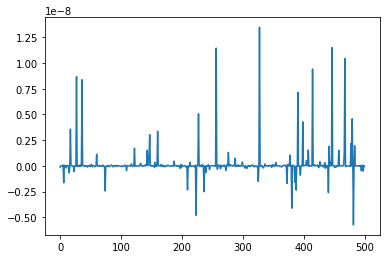

In [ ]:
# show the error of reconstruction.
plt.plot(x-x_rec)

## Regularization problem: Support Vector Machine (L1 regularization)

## Regularization problem: Ridge Regression (L2 regularization)

# Decision Tree

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
iris = load_iris()
X = iris['data']
y = iris['target']
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X, y)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2

